In [1]:
# Assignment 1 
# Introduction to Computational Science
# Marleen Rijksen (10465030)
# 29 September 2017

# necessary packages
%pylab inline
pylab.rcParams['figure.figsize'] = [10, 6]
from scipy.integrate import odeint
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


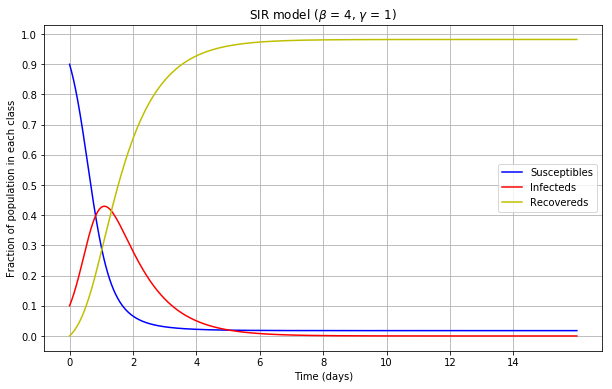

In [6]:
# Problem 1.1: basic SIR model

# SIR model function which returns derivative of y
def SIR(y, t, beta, gamma):
    S, I, R = y # y is vector [S, I, R]
    dydt = [-beta * S * I, beta * S * I - gamma * I, gamma * I]
    return dydt

# constants for epidemic case
beta = 4 
gamma = 1 
y0 = [0.9, 0.1, 0] # initial conditions
t = np.linspace(0, 16, 1000) # time span

# calculate solution
sol = odeint(SIR, y0, t, args=(beta, gamma))

# plot
plt.plot(t, sol[:, 0], 'b', label='Susceptibles')
plt.plot(t, sol[:, 1], 'r', label='Infecteds')
plt.plot(t, sol[:, 2], 'y', label='Recovereds')
plt.legend(loc='best')
plt.xlabel('Time (days)')
plt.ylabel('Fraction of population in each class')
plt.title('SIR model ($\\beta$ = {}, $\\gamma$ = {})'.format(beta, gamma))
plt.xticks(range(0, 16, 2))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid()
plt.show()

In [ ]:
# Problem 1.1 phase plots epidemic state

# constants
beta = 3   
gamma = 1 
t = np.linspace(0, 16, 1000) # time span

# iterate over initial conditions
for i in np.arange(0, 0.9, 0.1):    
    y0 = [i, 1 - i, 0]
    sol = odeint(SIR, y0, t, args=(beta, gamma))

    # plot for every condition
    plt.plot(sol[:, 0], sol[:, 1], 'b')

    # draw dot at t = 0
    plt.plot(sol[:, 0][0], sol[:, 1][0], marker='o', color='k')
    
    # initial conditions when recovereds are not 0
    y0 = [1 - i - 0.01, 0.01, i]
    sol = odeint(SIR, y0, t, args=(beta, gamma))
    
    # plot
    plt.plot(sol[:, 0], sol[:, 1], 'b')
    plt.plot(sol[:, 0][0], sol[:, 1][0], marker='o', color='k')
    
# plot some extra lines
plt.plot([0, 1], [1, 0.01], '--', color = 'darkgray')
plt.plot([0, 1], [0.01, 0.01], '--', color = 'darkgray')
plt.plot([gamma / float(beta), gamma / float(beta)], [0.01, 0.68], '--', color = 'r', label='dY/dt = 0')
plt.legend(loc='best')

# show final results
plt.title('Phase plot of the SIR model ($\\beta$ = {}, $\\gamma$ = {})'.format(beta, gamma))
plt.xlabel('Fraction of population which are susceptibles')
plt.ylabel('Fraction of population which are infecteds')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid()
plt.show()

In [ ]:
# problem 1.1 no epidemic state

# constants for no epidemic
beta = 1
gamma = 1.3
days = 12
t = np.linspace(0, days, 1000) # time span
y0 = [0.9, 0.1, 0] # initial conditions

# calculate new solution
sol = odeint(SIR, y0, t, args=(beta, gamma))

# plot 
plt.plot(t, sol[:, 0], 'b', label='Susceptibles')
plt.plot(t, sol[:, 1], 'r', label='Infecteds')
plt.plot(t, sol[:, 2], 'y', label='Recovereds')
plt.legend(loc='best')
plt.xlabel('Time (days)')
plt.ylabel('Fraction of population in each class')
plt.title('SIR model in no epidemic state ($\\beta$ = {}, $\\gamma$ = {})'.format(beta, gamma))
plt.xticks(range(0, days + 1, 1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid()
plt.show()

In [ ]:
# 1.1 phase plot no epidemic state

# constants
beta = 1
gamma = 1.3
days = 12
t = np.linspace(0, days, 1000) # time span

# iterate over initial conditions
for i in np.arange(0, 1, 0.1):    
    y0 = [i, 1 - i, 0]
    sol = odeint(SIR, y0, t, args=(beta,gamma))

    # plot for every condition
    plt.plot(sol[:, 0], sol[:, 1], 'b')

    # draw dot at t = 0
    plt.plot(sol[:, 0][0], sol[:, 1][0], marker='o', color='k')    

# plot some extra lines
plt.plot([0, 1], [1, 0.01], '--', color = 'darkgray')
plt.plot([0, 1], [0.0, 0.0], '--', color = 'darkgray')
plt.title('Phase Plot of the no epidemic state ($\\beta$ = {}, \
          $\\gamma$ = {})'.format(beta, gamma))
    
# show final results
plt.xlabel('Fraction of population which are susceptibles')
plt.ylabel('Fraction of population which are infecteds')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid()
plt.show()

In [ ]:
# Problem 1.2: influenza outbreak in school

# data of influenza disease in boarding school
day = [x for x in range(0, 15)]
number_infected = [1, 3, 8, 28, 75, 221, 291, 255, 235, 190, 125, 70, 28, 12, 5]

# initial conditions
y0 = [762, 1, 0] 
t = np.linspace(0, 15, 1000)
N = 763

# function which returns derivative of y, not normalized version
def SIR_model_N(y, t, beta, gamma):
    S, I, R = y # y is vector [S, I, R]
    dydt = [- beta * S * I / N, beta * S * I / N - gamma * I, gamma * I]
    return dydt

# function which integrates our ODEs for different beta & gamma
def integrated_SIR(t, beta, gamma):
    sol = odeint(SIR_model_N, y0, t, args=(beta, gamma))
    return sol[:, 1]

# now we have to fit our integrated function on the data
# note that we only change beta and gamma, NOT the initial conditions
# use scipy.optimize.curve_fit to fit our model for different 
# beta and gamma to our data points
popt, pcov = curve_fit(integrated_SIR, day, number_infected)
beta = popt[0]
gamma = popt[1]

# plot data and model fit
plt.scatter(day, number_infected, marker='o', label='Data')
plt.plot(t, integrated_SIR(t, beta, gamma), 'r', label='Fit of SIR model \
         ($\\beta$ = {:.2f}, $\\gamma$ = {:.2f})'.format(beta, gamma))
plt.legend(loc='best')
plt.xlabel('Day')
plt.ylabel('Number of infecteds')
plt.xticks(range(0, 16, 1))
plt.yticks(np.arange(0, 370, 30))
plt.grid()
plt.title('Influenza Outbreak in School')
plt.show()

In [ ]:
# problem 1.3: vaccination 

# change initial conditions, more boys are in the recovereds 
# class because of the vaccination
N = 763
I0 = 1
R0 = 590
S0 = N - R0 - I0
y0 = [S0, I0, R0]
t = np.linspace(0, 18, 1000)

# function which returns derivative of y, not normalized version
def SIR_model_N(y, t, beta, gamma):
    S, I, R = y # y is vector [S, I, R]
    dydt = [- beta * S * I / N, beta * S * I / N - gamma * I, gamma * I]
    return dydt

# calculate solution
sol = odeint(SIR_model_N, y0, t, args=(beta,gamma))

# plot data and model fit
plt.plot(t, sol[:, 1], 'r', label='Infecteds') 
plt.plot(t, sol[:, 0], 'b', label='Susceptibles')
plt.plot(t, sol[:, 2], 'y', label = 'Recovereds')
plt.legend(loc='best')
plt.xlabel('Day')
plt.ylabel('Number of infecteds')
plt.xticks(range(0, 20, 1))
plt.yticks(np.arange(0, 620, 30))
plt.grid()
plt.title('SIR Model in Boarding School ($\\beta$ = {:.2f}, $\\gamma$ = {:.2f})'\
          .format(beta, gamma))
plt.show()

In [ ]:
# 2.1 include birth and mortality in model

# SIR model function which returns derivative of y for demographic version
def SIR_dem(y, t, beta, gamma, mu):
    S, I, R = y # y is vector [S, I, R]
    dydt = [mu - beta * S * I - mu * S, beta * S * I - gamma * I - mu * I, \
            gamma * I - mu * R]
    return dydt

# define constants for endemic state
beta = 520
gamma = 1 / 0.019178
mu = 1 / 70.

# define initial conditions
S0 = 0.1
I0 = 2.5 * (10 ** -4)
y0 = [S0, I0, 1 - S0 - I0]

# define timespan and number of steps
t = np.linspace(20, 80, 5000)

# calculate solution
sol = odeint(SIR_dem, y0, t, args=(beta, gamma, mu))

# plot, this is the endemic case
plt.plot(t, sol[:, 1], 'r', label='Infecteds')
plt.legend(loc='best')
plt.xlabel('time (years)')
plt.ylabel('Fraction of population in infecteds class')
plt.title('SIR model with birth and mortality ($\\beta$ = {:.3f},\
          $\\gamma$ = {:.3f}, $\\mu$ = {:.3f})'.format(beta, gamma, mu))
plt.grid()
plt.xticks(range(20, 80, 5))
plt.yticks(np.arange(0.000230, 0.000261, 0.000003))
plt.show()

In [ ]:
# 2.1 fast fourier transform of oscillation
# source: https://plot.ly/matplotlib/fft/

# intervals
Fs = 5000 # sampling rate
Ts = 1.0 / Fs # sampling interval
t = np.arange(20, 80, Ts) # time vector

# calculate solution
y = odeint(SIR_dem, y0, t, args=(beta, gamma, mu))[:, 1]

# substract the mean to correct for line through middle of function
y = y - np.mean(y) 

# determine frequency range (one sided)
n = len(y) # length of the signal
k = np.arange(n)
T = n / Fs # signal interval
frq = k / T 
frq = frq[range(n // 2)] 

# calculate fft and normalize
Y = np.fft.fft(y) / n 
Y = Y[range(n // 2)]

# plot
plt.plot(frq, abs(Y))
plt.xlim(0, 2)
plt.xlabel('freq (hz)')
plt.ylabel('Y(freq)')
plt.title('Fourier transform of SIR model ($\\beta$ = {:.3f}, $\\gamma$ =\
          {:.3f}, $\\mu$ = {:.3f})'.format(beta, gamma, mu))
plt.grid()
plt.xticks(np.arange(0, 2, 0.1))
plt.show()


In [ ]:
# find frequency at which Y is maximal
maxi = list(Y).index(max(Y))
print(frq[maxi])

In [ ]:
# 2.1 phase plot of demographic SIR model in endemic state

# define constants
beta = 1
gamma = 1 / 3
mu = 1 / 60.
t = np.linspace(0, 1000, 50000)

# iterate over initial conditions
for i in np.arange(0, 1, 0.2):    
    y0 = [i, 1 - i, 0]
    sol = odeint(SIR_dem, y0, t, args=(beta,gamma, mu))

    # plot for every condition
    plt.plot(sol[:, 0], sol[:, 1], 'b')

    # draw dot at t = 0
    plt.plot(sol[:, 0][0], sol[:, 1][0], marker='o', color='k')
    
    # initial conditions when recovereds are not 0
    y0 = [1 - i - 0.01, 0.01, i]
    sol = odeint(SIR_dem, y0, t, args=(beta, gamma, mu))
    
    # plot
    plt.plot(sol[:, 0], sol[:, 1], 'b')
    plt.plot(sol[:, 0][0], sol[:, 1][0], marker='o', color='k')

# plot extra lines
plt.plot([0, 1], [1, 0.01], '--', color = 'darkgray')
plt.plot([0, 1], [0.01, 0.01], '--', color = 'darkgray')    

# plot dot at final point
plt.plot(sol[:, 0][50000 - 1], sol[:, 1][50000 - 1], marker = 'o', color = 'r')

# show final results
plt.title('Phase Plot of the endemic state ($\\beta$ = {:.3f}, \
          $\\gamma$ = {:.3f}), $\\mu$ = {:.3f}'.format(beta, gamma, mu))
plt.xlabel('Fraction of population which are susceptibles')
plt.ylabel('Fraction of population which are infecteds')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid()
plt.show()

In [ ]:
# problem 2.2: add infection induced mortality

# SIR model function with infection induced mortality
def SIR_dem_mort(y, t, beta, gamma, mu, p):
    S, I, R = y # y is vector [S, I, R]
    dydt = [mu - beta / N * S * I - mu * S, beta * S * I / N - \
            ((gamma + mu) / (1 - p)) * I, gamma * I - mu * R]
    return dydt

# define constants
beta = 0.8
gamma = 0.4
mu = 1 / 60.
p = 0.05
years = 70

# define initial conditions
N = 1200
S0 = 1000
I0 = 200
y0 = [S0, I0, N - S0 - I0]

# define timespan and number of steps
t = np.linspace(0, years, 10000)

# calculate solution
sol = odeint(SIR_dem_mort, y0, t, args=(beta, gamma, mu, p))

# plot
plt.plot(t, sol[:, 0], 'b', label='Susceptibles')
plt.plot(t, sol[:, 1], 'r', label='Infecteds')
plt.plot(t, sol[:, 2], 'y', label='Recovereds')
plt.plot(t, sol[:, 0] + sol[:, 2] + sol[:, 1], 'm', label = \
         'Total Population')
plt.legend(loc='best')
plt.xlabel('Time (years)')
plt.ylabel('Population in each class')
plt.xticks(np.arange(0, years + 5, 5))
plt.yticks(range(0, S0 + 200, 100))
plt.title('SIR model with infection induced mortality ($\\beta$ = \
          {:.3f}, $\\gamma$ = {:.3f}, $\\mu$ = {:.3f}, $p$ = {:.3f})'\
          .format(beta, gamma, mu, p))
plt.grid()
plt.show()

In [ ]:
# Problem 3: SIS model
# function which returns derivatives of SIS model
def SIS(y, t, beta, gamma):
    S, I = y # y is [S, I]
    dydt = [gamma * I - beta * I * S, beta * S * I - gamma * I]
    return dydt

# define constants
beta = 2.7
gamma = 1

# define initial conditions
y0 = [0.9, 0.1]

# define timespan and number of steps
t = np.linspace(0, 10, 1000)

# calculate solution
sol = odeint(SIS, y0, t, args=(beta, gamma))

# calculat equilibrium
print(sol[:, 0][999], sol[:, 1][999])

# plot
plt.plot(t, sol[:, 0], 'b', label='Susceptibles')
plt.plot(t, sol[:, 1], 'r', label='Infecteds')
plt.legend(loc='best')
plt.xlabel('Time (years)')
plt.ylabel('Fraction of population in each class')
plt.xticks(range(11))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid()
plt.title('Time evolution of SIS model ($\\beta$ = {:.2f}, $\\gamma$ = {:.2f})'\
          .format(beta,gamma))
plt.show()


In [ ]:
# Problem 3: SEIR model

# function which returns derivatives of SEIR model
def SEIR(y, t, beta, gamma, mu, sigma):
    S, E, I, R = y # y is vector [S, E, I, R]
    dydt = [mu - (beta * I + mu) * S, beta * S * I - (mu + sigma) * E,\
            sigma * E - (mu + gamma) * I, gamma * I - mu * R]
    return dydt

# define constants
gamma = (1 / 10)
mu = 1 / 70.
# R0 = 5
beta = R0 * (gamma + mu)
sigma = 0.1
days = 200

# define initial conditions
N = 1000
S0 = 950. / N
E0 = 0. / N
I0 = 50. / N
y0 = [S0, 0, I0, 0]

# define timespan and number of steps
t = np.linspace(0, days, 10000)

# calculate solution
sol = odeint(SEIR, y0, t, args=(beta, gamma, mu, sigma))

# plot
plt.plot(t, sol[:, 0], 'b', label='Susceptibles')
plt.plot(t, sol[:, 1], 'm', label='Exposed')
plt.plot(t, sol[:, 2], 'r', label='Infecteds')
plt.plot(t, sol[:, 3], 'y', label='Recovered')
plt.legend(loc='best')
plt.xlabel('time (days)')
plt.ylabel('Fraction of population in each class')
plt.title('SEIR model ($\\beta$ = {:.3f}, $\\gamma$ = {:.3f}, \
          $\\mu$ = {:.3f}, $\\sigma$ = {:.3f})'.format(beta, gamma, mu, sigma))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(range(0, 205, 10))
plt.grid()
plt.show()

In [ ]:
# problem 2.1: include birth and mortality in SIR model
# function which returns derivative of y for demographic model
def SIR_dem(y, t, beta, gamma, mu):
    S, I, R = y # y is vector [S, I, R]
    dydt = [mu - beta * S * I - mu * S, beta * S * I - gamma * I - mu * I, gamma * I - mu * R]
    return dydt

# define constants
gamma = 1 / 10
mu = 1 / 70.
R0 = 5
beta = R0 * (gamma + mu)

# define initial conditions
N = 1000
S0 = 970. / N
I0 = 30. / N
y0 = [S0, I0, 0]

# define timespan and number of steps
t = np.linspace(0, 200, 10000)

# calculate solution
sol = odeint(SIR_dem, y0, t, args=(beta, gamma, mu))

# plot, this is the epidemic case
plt.plot(t, sol[:, 1], 'r', label='Infecteds')
plt.plot(t, sol[:, 0], 'b', label='Susceptibles')
plt.plot(t, sol[:, 2], 'y', label='Recovereds')
plt.legend(loc='best')
plt.xlabel('time (days)')
plt.ylabel('Fraction of population in infecteds class')
plt.title('SIR model with birth and mortality ($\\beta$ = {:.3f}, \
          $\\gamma$ = {:.3f}, $\\mu$ = {:.3f})'.format(beta, gamma, mu))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(range(0, 205, 10))
plt.grid()
plt.show()

In [ ]:
# problem 3: SEIR model with seasonality
def SEIR_seas(y, t, beta0, beta1, gamma, mu, sigma, omega):
    S, E, I, R = y # y is vector [S, E, I, R]
    dydt = [mu - (beta0 * (1 + beta1 * np.cos(omega * t)) * I + mu) * S, \
            beta0 * (1 + beta1 * np.cos(omega * t)) * S * I - (mu + sigma) * E,\
            sigma * E - (mu + gamma) * I, gamma * I - mu * R]
    return dydt

# define constants
R0 = 5
mu = 1 / 70.
gamma = 1 / 10.
beta0 = R0 * (gamma + mu)
beta1 = 0.2
omega = 0.2 * np.pi
sigma = 0.1
days = 200

# define initial conditions
N = 1000
S0 = 950. / N
E0 = 20. / N
I0 = 30. / N
y0 = [S0, 0, I0, 0]
S = []
E = []
I = []
R = []

# define timespan and number of steps
t = np.linspace(0, 300, 10000)

# find solution
sol = odeint(SEIR_seas, y0, t, args=(beta0, beta1, gamma, mu, sigma, omega))

# plot
plt.plot(t, sol[:, 0], 'b', label='Susceptibles')
plt.plot(t, sol[:, 1], 'm', label='Exposed')
plt.plot(t, sol[:, 2], 'r', label='Infecteds')
plt.plot(t, sol[:, 3], 'y', label='Recovered')
plt.legend(loc='best')
plt.xlabel('Time (years)')
plt.ylabel('Fraction of population in each class')
plt.title('SEIR model with seasonal effects ($\\beta(t)$ = {:.2f}\
          (1 + {}cos({:.2f}t)), $\\gamma$ = {:.3f}, $\\mu$ = {:.3f}, $\\sigma$ = {:.3f})'\
          .format(beta0, beta1, omega, gamma, mu, sigma))
plt.xticks(range(0, 310, 20))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid()
plt.show()

In [ ]:
print(odeint(SEIR, y0, 2, args=(beta, gamma, mu, sigma))[0])

In [ ]:
# problem 3: SEIR model with seasonality

# initial conditions and constants
I0 = 10 ** -3
E0 = 10 ** -3
S0 = 6 * 10 ** -2
y0 = [S0, E0, I0, 1 - S0 - E0 - I0]
t = np.linspace(0,1100,22001)
beta0 = 1241
beta1 = 0.18
omega = 2 * np.pi #2 * 2 / 2.1 * np.pi
gamma = 365 / 5
mu = 0.02
sigma = 365 / 8

# calculate solution
sol = odeint(SEIR_seas,y0,t,args=(beta0, beta1, gamma, mu, sigma, omega))

# plot! 
plt.plot(t, np.log(sol[:, 2]), label='Infecteds')
plt.legend(loc='best')
plt.xlim([990,1000])
plt.ylim([-12,-6])
plt.ylabel('Logarithm of the fraction of infecteds')
plt.xlabel('Time(years)')
plt.xticks(np.arange(990, 1000, 1))
plt.title('Time evolution of SEIR model with added seasonality \
          ($\\beta_1$ = {}, $R_0$ = 17)'.format(beta1))
plt.grid()
plt.show()